In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [88]:
df = pd.read_csv('https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Earnings/data/earnings.csv')

In [89]:
df.head()

height  weight  male     earn  earnk ethnicity  education  \
0      74   210.0     1  50000.0   50.0     White       16.0   
1      66   125.0     0  60000.0   60.0     White       16.0   
2      64   126.0     0  30000.0   30.0     White       16.0   
3      65   200.0     0  25000.0   25.0     White       17.0   
4      63   110.0     0  50000.0   50.0     Other       16.0   

   mother_education  father_education  walk  exercise  smokenow  tense  angry  \
0              16.0              16.0     3         3       2.0    0.0    0.0   
1              16.0              16.0     6         5       1.0    0.0    0.0   
2              16.0              16.0     8         1       2.0    1.0    1.0   
3              17.0               NaN     8         1       2.0    0.0    0.0   
4              16.0              16.0     5         6       2.0    0.0    0.0   

   age  
0   45  
1   58  
2   29  
3   57  
4   91

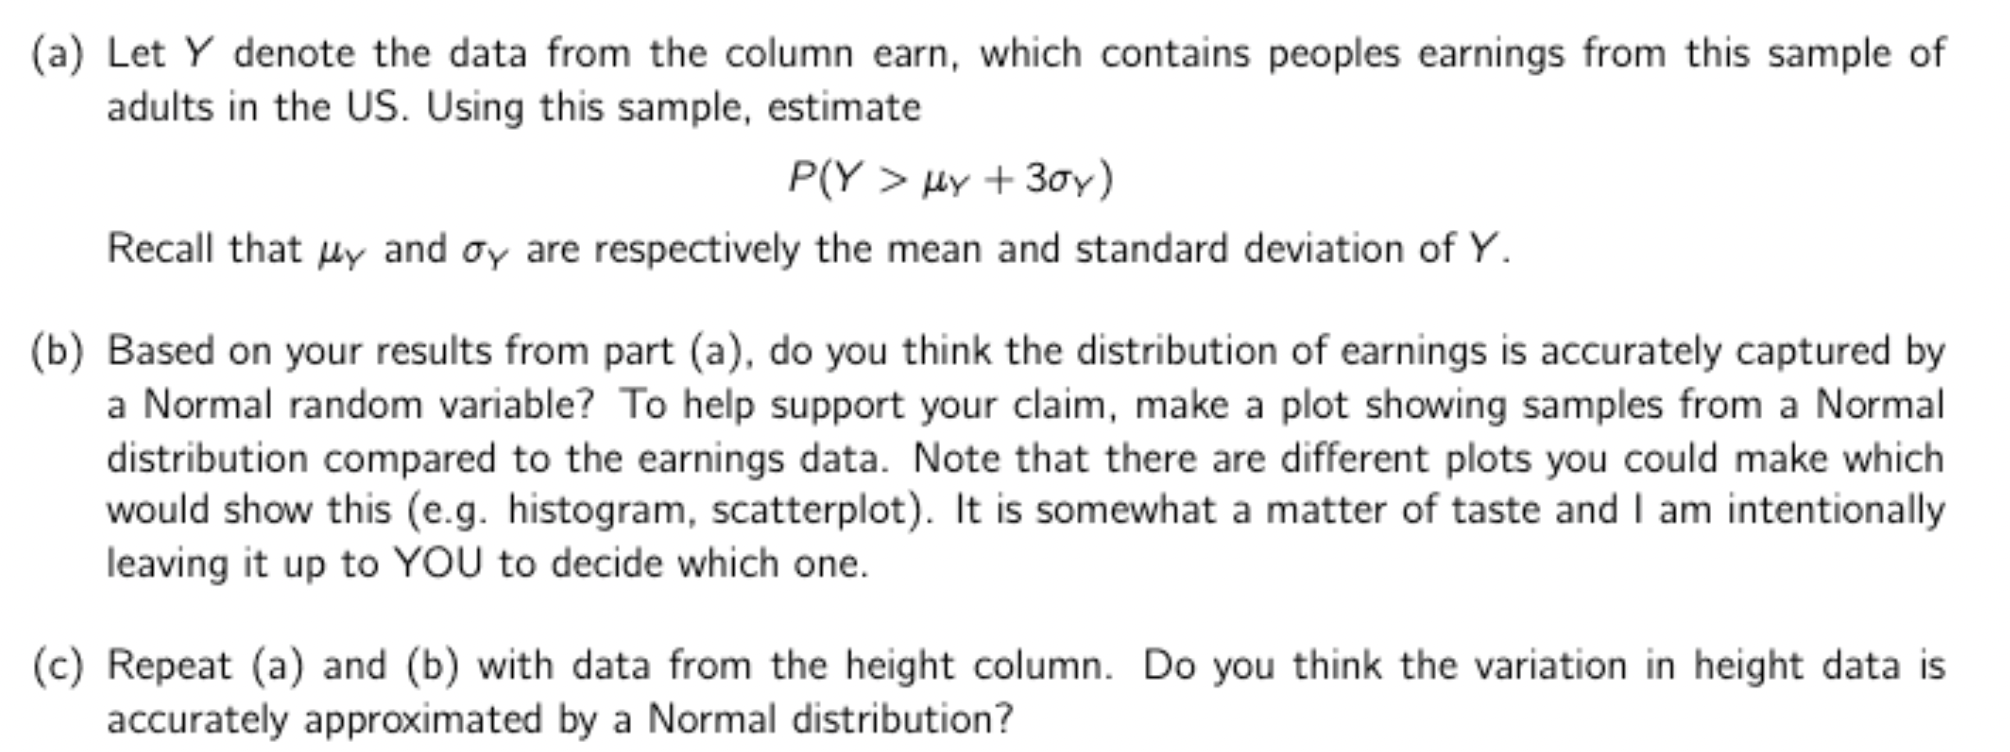

In [158]:
## a 

## Calculate the mean and standard deviation of Y
mu_y = df.earn.mean()
sd_y = df.earn.std()

## Calculate the probability Y > mu_y + 3*sd_y
print(f'I estimate P(Y > mu_y + 3 sigma_y as {round(df[df.earn > mu_y + 3*sd_y].shape[0]/df.earn.shape[0],4)}.\
\nIt does not appear that the distribution of earnings is accurately captured by a Normal random variable as it\
does not appear to be distributed symmetrically around the mean.')


I estimate P(Y > mu_y + 3 sigma_y as 0.0176.
It does not appear that the distribution of earnings is accurately captured by a Normal random variable as itdoes not appear to be distributed symmetrically around the mean.


## It does not appear that the distribution of earnings is accurately captured by a Normal random variable as it does not appear to be distributed symmetrically around the mean. 

In [152]:
upper = df[df.earn > mu_y].shape[0]/df.earn.shape[0]
lower = df[df.earn < mu_y].shape[0]/df.earn.shape[0]


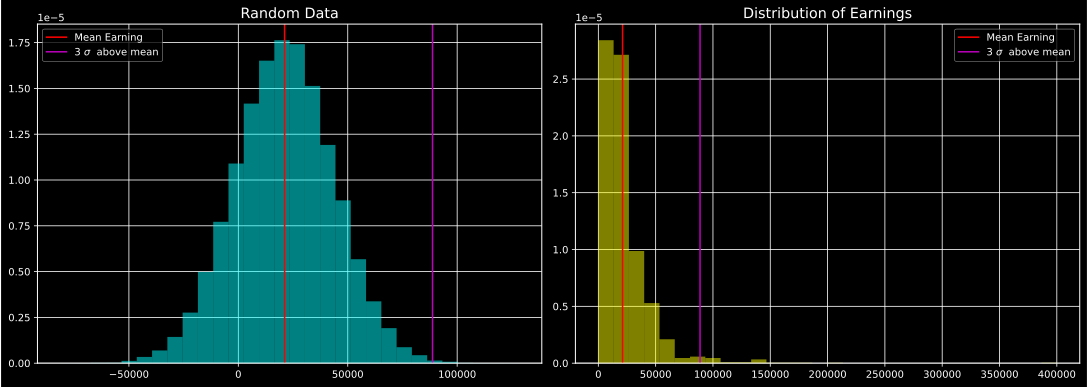

In [159]:
## b 

## Create grid
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
window = fig.add_gridspec(2, 2)

## Generate normal data
part_b = np.random.normal(mu_y, sd_y, 100000)

## Plot normal data
ax0 = fig.add_subplot(window[0, 0])
ax0.hist(part_b, bins=30, color='cyan', alpha=0.5, density = True)
ax0.axvline(mu_y, c = 'r', label = 'Mean Earning')
ax0.axvline(mu_y + 3*sd_y, c = 'm', label = r'3 $\sigma$  above mean')
ax0.set_title('Random Data')

## Plot actual data
ax1 = fig.add_subplot(window[0, 1])
ax1.hist(df['earn'], bins=30, color='yellow', alpha=0.5, density = True)
ax1.axvline(mu_y, c = 'r', label = 'Mean Earning')
ax1.axvline(mu_y + 3*sd_y, c = 'm', label = r'3 $\sigma$  above mean')
ax1.set_title('Distribution of Earnings')


## Set theme and show 
plt.style.use('dark_background')
ax0.legend()
ax1.legend()
plt.savefig("math50_hw3_plot1.png")

plt.show()





## It appears the distribution of heights may actually be approximated by a normal random variable as it is much more symmetric around the mean height.

In [93]:
## Calculate the mean and standard deviation of the height values
mu_h = df.height.mean()
sd_h = df.height.std()

## Check out how the data is distributed around the mean 
upper = df[df.height > mu_h].shape[0]/df.height.shape[0]
lower = df[df.height < mu_h].shape[0]/df.height.shape[0]
upper, lower

(0.44823788546255505, 0.551762114537445)

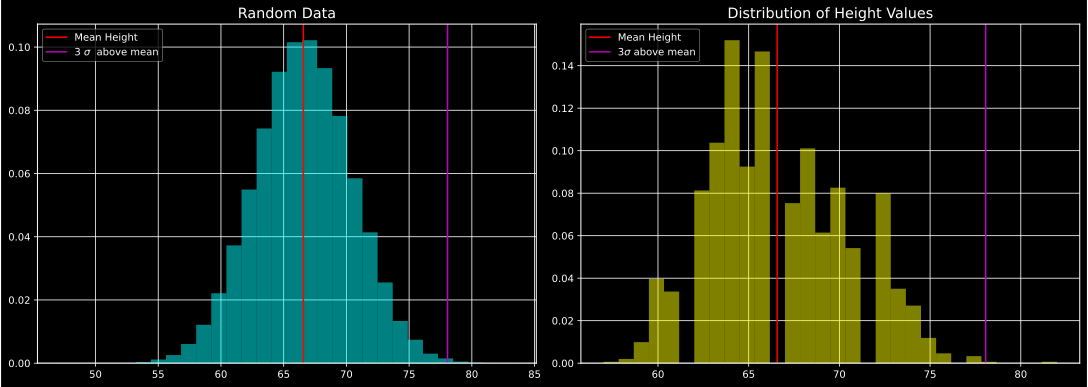

In [160]:
## c 

## Calculate the probability Y > mu_y + 3*sd_y
df[df.height > mu_h + 3*sd_h].shape[0]/df.height.shape[0]

## Create grid
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
window = fig.add_gridspec(2, 2)

## Generate normal data
part_c = np.random.normal(mu_h, sd_h, 100000)

## Plot normal data
ax0 = fig.add_subplot(window[0, 0])
ax0.hist(part_c, bins=30, color='cyan', alpha=0.5, density = True)
ax0.axvline(mu_h, c = 'r', label = 'Mean Height')
ax0.axvline(mu_h + 3*sd_h, c = 'm', label = r'3 $\sigma$  above mean')
ax0.set_title('Random Data')

## Plot actual data
ax1 = fig.add_subplot(window[0, 1])
ax1.hist(df['height'], bins=30, color='yellow', alpha=0.5, density = True)
ax1.axvline(mu_h, c = 'r', label = 'Mean Height')
ax1.axvline(mu_h + 3*sd_h, c = 'm', label = r'3$\sigma$ above mean')
ax1.set_title('Distribution of Height Values')


## Set theme and show 
plt.style.use('dark_background')
ax0.legend()
ax1.legend()
plt.savefig("math50_hw3_plot2.png")

plt.show()


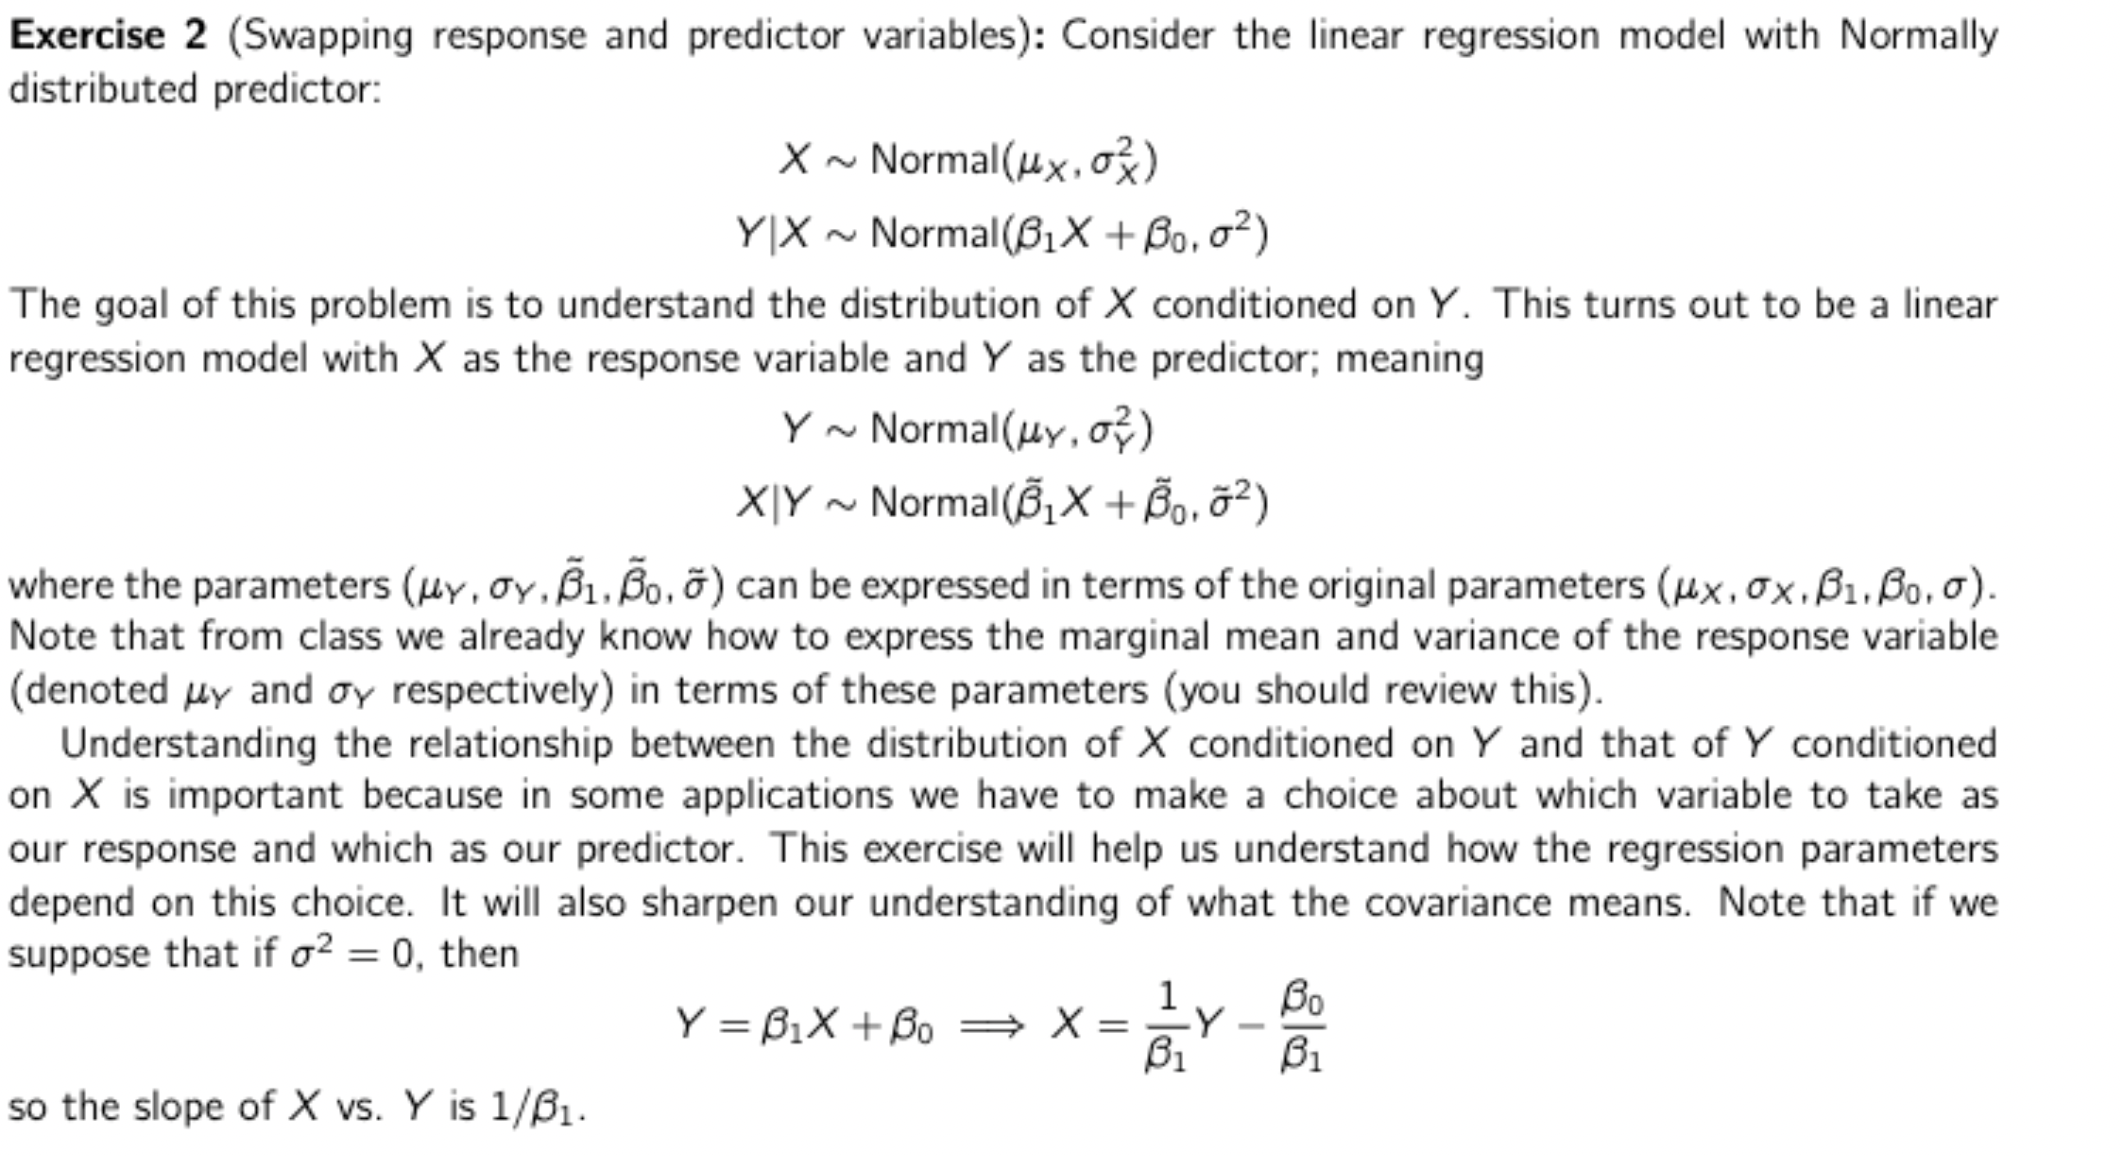

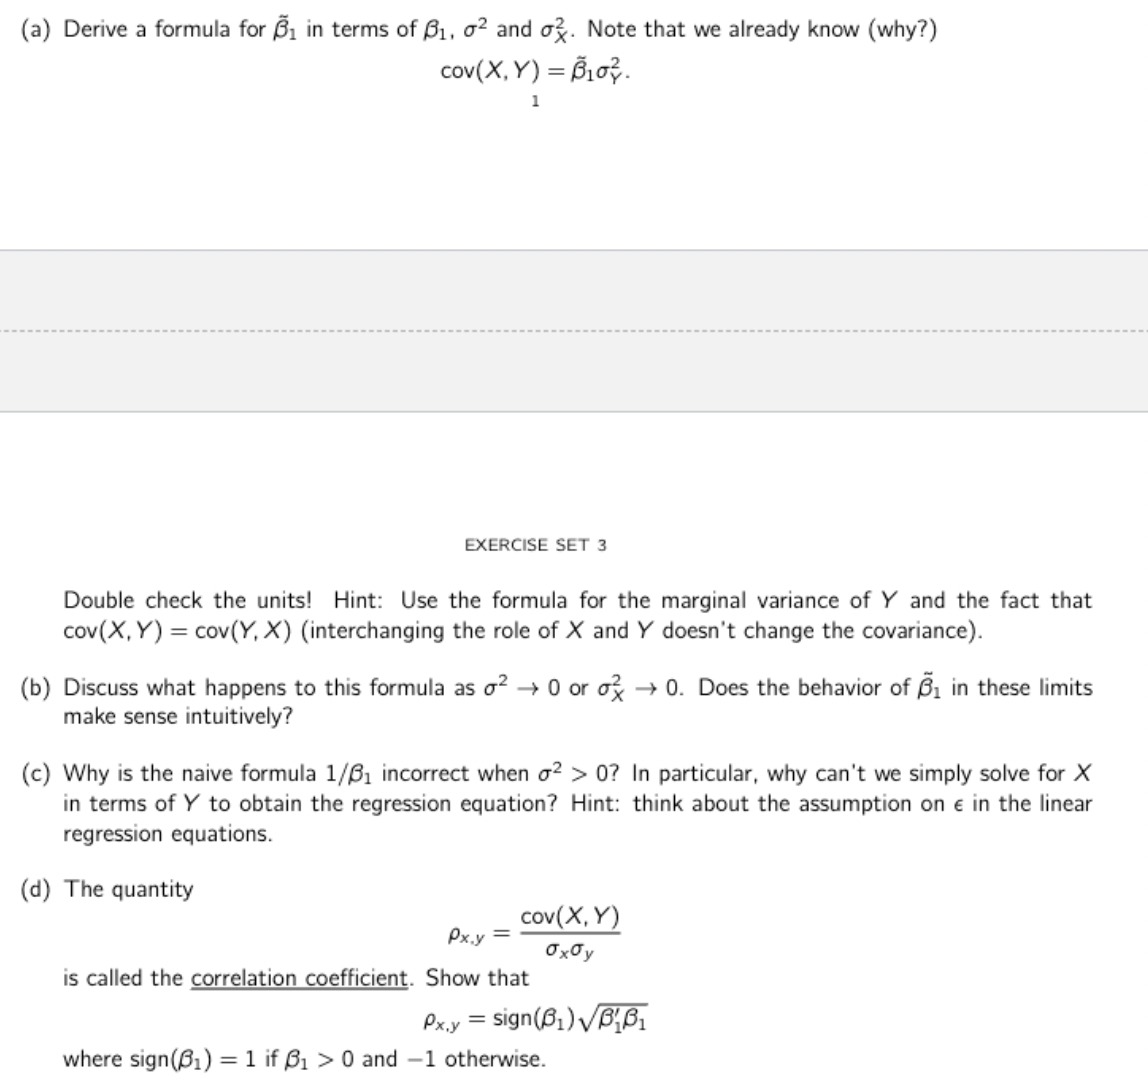

## a 


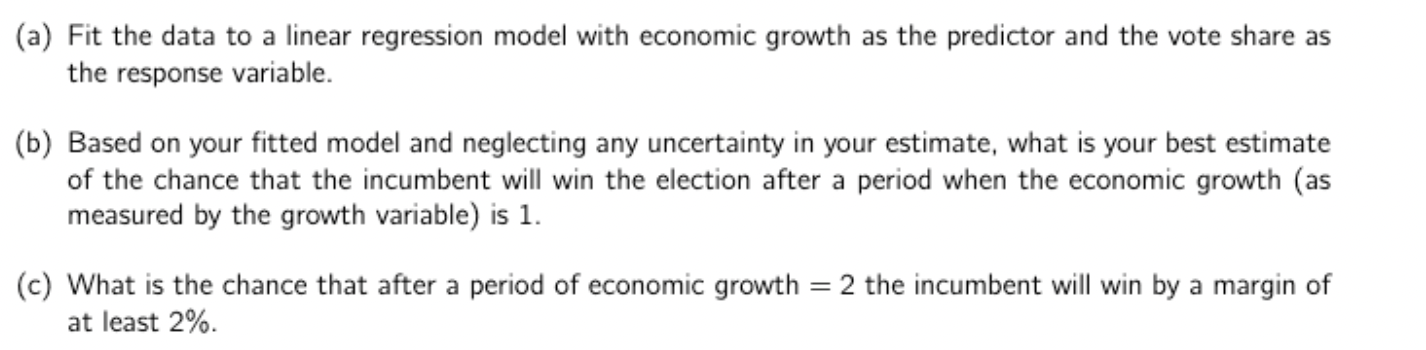

In [101]:
df3 = pd.read_table("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/ElectionsEconomy/data/hibbs.dat", sep="\s+")
df3.head()

year  growth   vote inc_party_candidate other_candidate
0  1952    2.40  44.60           Stevenson      Eisenhower
1  1956    2.89  57.76          Eisenhower       Stevenson
2  1960    0.85  49.91               Nixon         Kennedy
3  1964    4.21  61.34             Johnson       Goldwater
4  1968    3.02  49.60            Humphrey           Nixon

In [105]:
## a 
import statsmodels.api as sm
df3 = pd.read_table("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/ElectionsEconomy/data/hibbs.dat", sep="\s+")
df3.head()

## Specify X, y 
X = df3['growth']
y = df3['vote']

## Create and fit model, get results
model = sm.OLS(y,sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   vote   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     19.32
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           0.000610
Time:                        01:00:00   Log-Likelihood:                -42.839
No. Observations:                  16   AIC:                             89.68
Df Residuals:                      14   BIC:                             91.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2476      1.622     28.514      0.0

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [161]:
from scipy.stats import norm

## B1,B0, sigma2 predictions from model
beta0_hat,beta1_hat = results.params
sigma2_hat = results.mse_resid 
y_pred = beta0_hat + beta1_hat*1

## Find numerator of var formula
sum_squared_dev = np.sum((df3['growth'] - df3['growth'].mean()) ** 2)

## Find standard error when growth = 1 
n = len(df)
se_y_hat = np.sqrt(sigma2_hat * (1/n + (1 -\
                                        df3['growth'].mean())**2 / sum_squared_dev))

## Find prob of our prediction based on our model
z = (50 - y_pred)/se_y_hat
prob = 1 - norm.cdf(z)
print(f'Following  a period where the economic growth was 1, the incumbent\n has a {round(prob*100,4)}% chance of getting more than 50% of the votes.')

Following  a period where the economic growth was 1, the incumbent
 has a 13.6497% chance of getting more than 50% of the votes.


In [153]:
from scipy.stats import norm

## B1,B0, sigma2 predictions from model
beta0_hat,beta1_hat = results.params
sigma2_hat = results.mse_resid 
y_pred = beta0_hat + beta1_hat*2

## Find numerator of var formula
sum_squared_dev = np.sum((df3['growth'] - df3['growth'].mean()) ** 2)

## Find standard error when growth = 1 
n = len(df)
se_y_hat = np.sqrt(sigma2_hat * (1/n + (2 - df3['growth'].mean())**2 / sum_squared_dev))

## Find prob of our prediction based on our model
z = (52 - y_pred)/se_y_hat
prob = 1 - norm.cdf(z)
print(f'Following  a period where the economic growth was 2, the incumbent\n has a {round(prob*100,4)}% chance of getting more than 52% of the votes.')

Following  a period where the economic growth was 2, the incumbent
 has a 99.9417% chance of getting more than 52% of the votes.
